In [ ]:
! pip install nltk


In [ ]:
! pip install wordcloud


#Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
# Load data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/train.csv', encoding='latin-1')
print(df.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  



#Exploratory Data Annalysis




Plot 1 :- no. of comment in each label

<ipython-input-5-b7a689793427>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


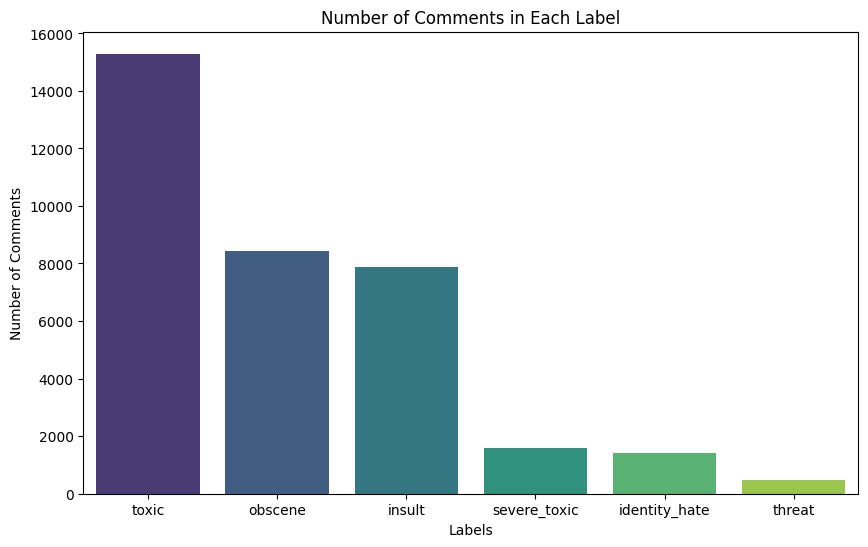

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List the label columns explicitly
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Sum up the label columns
label_counts = df[label_columns].sum().sort_values(ascending=False)

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Number of Comments in Each Label')
plt.xlabel('Labels')
plt.ylabel('Number of Comments')
plt.show()


plot 2 :- no. of comment with multiple labels

<ipython-input-6-9c6614b03647>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_count_distribution.index, y=label_count_distribution.values, palette='viridis')


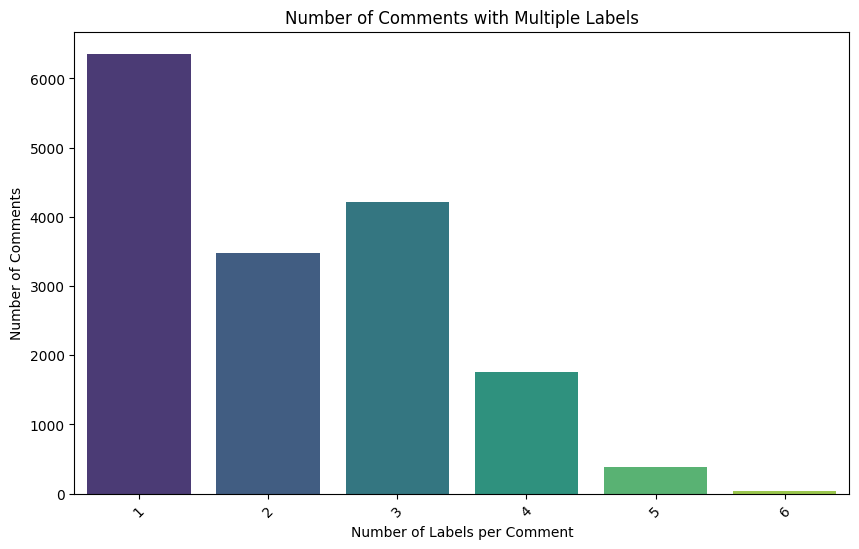

In [ ]:

df['label_count'] = df[label_columns].sum(axis=1)

# Filter out the comments that have no labels
df_non_zero_labels = df[df['label_count'] > 0]

plt.figure(figsize=(10, 6))
label_count_distribution = df_non_zero_labels['label_count'].value_counts().sort_index()
sns.barplot(x=label_count_distribution.index, y=label_count_distribution.values, palette='viridis')
plt.title('Number of Comments with Multiple Labels')
plt.xlabel('Number of Labels per Comment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()



plot-3 Number of Comments of Different Lengths

<ipython-input-7-579fcce982a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=length_distribution.index, y=length_distribution.values, palette='viridis')


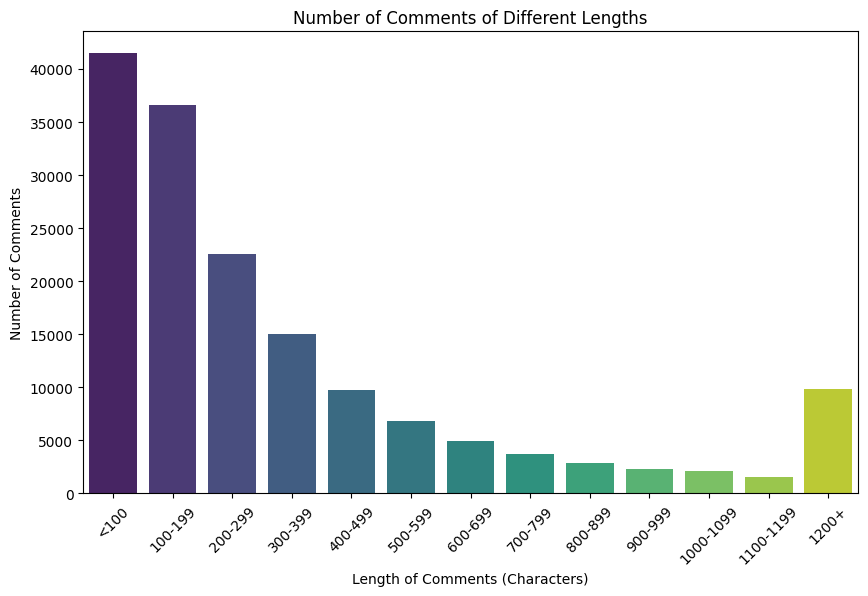

In [ ]:
df['comment_length'] = df['comment_text'].apply(len)

plt.figure(figsize=(10, 6))
length_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, float('inf')]
length_labels = ['<100', '100-199', '200-299', '300-399', '400-499', '500-599', '600-699', '700-799', '800-899', '900-999', '1000-1099', '1100-1199', '1200+']
df['length_category'] = pd.cut(df['comment_length'], bins=length_bins, labels=length_labels, right=False)

length_distribution = df['length_category'].value_counts().sort_index()
sns.barplot(x=length_distribution.index, y=length_distribution.values, palette='viridis')
plt.title('Number of Comments of Different Lengths')
plt.xlabel('Length of Comments (Characters)')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

Word Cloud

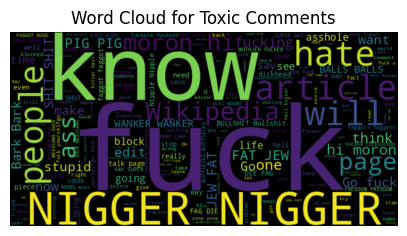

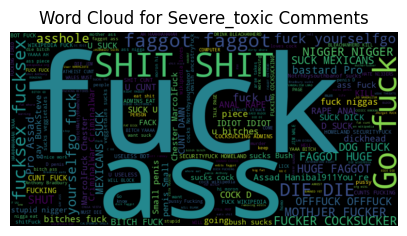

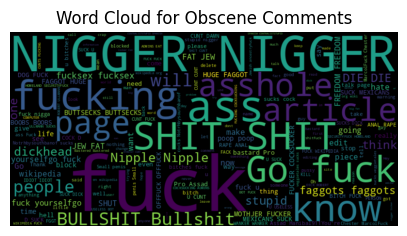

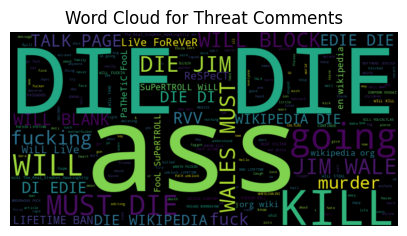

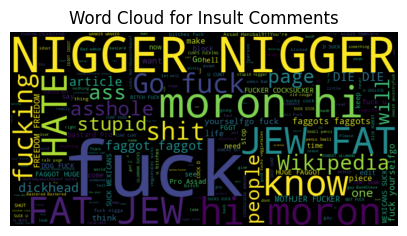

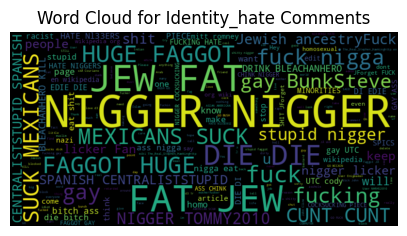

In [ ]:
from wordcloud import WordCloud

# List of multiclass labels
multiclass_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Generate word cloud for each label
for label in multiclass_labels:
    # Filter comments by label
    comments_for_label = df[df[label] == 1]['comment_text']

    # Combine comments into a single string
    all_comments_for_label = ' '.join(comments_for_label)

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_comments_for_label)

    # Display the word cloud
    plt.figure(figsize=(5, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label.capitalize()} Comments')
    plt.axis('off')
    plt.show()


Data Preprocessing

In [ ]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to 'comment_text' column and create a new column 'comment_text_preprocessed'
df['comment_text_preprocessed'] = df['comment_text'].apply(preprocess_text)

# Print the preprocessed text
print(df['comment_text_preprocessed'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0    explanation edits made username hardcore metal...
1    d'aww match background colour 'm seemingly stu...
2    hey man 'm really trying edit war 's guy const...
3    `` ca n't make real suggestion improvement won...
4                     sir hero chance remember page 's
Name: comment_text_preprocessed, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['comment_text_preprocessed'], df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']], test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform TF-IDF vectorizer on training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
! pip install lightgbm


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize MultiOutputClassifier with Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_multi_classifier = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# Fit MultiOutputClassifier with Random Forest model
rf_multi_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
rf_multi_y_pred = rf_multi_classifier.predict(X_test_tfidf)

# Evaluate MultiOutputClassifier with Random Forest model
rf_multi_accuracy = accuracy_score(y_test, rf_multi_y_pred)
print("Random Forest Multi-label Accuracy:", rf_multi_accuracy)
print("Random Forest Multi-label Classification Report:")
print(classification_report(y_test, rf_multi_y_pred))



Random Forest Multi-label Accuracy: 0.9158389472035093
Random Forest Multi-label Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75      3056
           1       0.41      0.05      0.09       321
           2       0.85      0.72      0.78      1715
           3       0.57      0.05      0.10        74
           4       0.76      0.58      0.66      1614
           5       0.67      0.11      0.19       294

   micro avg       0.82      0.61      0.70      7074
   macro avg       0.69      0.37      0.43      7074
weighted avg       0.80      0.61      0.68      7074
 samples avg       0.06      0.06      0.06      7074



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.multioutput import MultiOutputClassifier

from sklearn.metrics import accuracy_score, classification_report
# Initialize MultiOutputClassifier with LightGBM classifier
lgbm_classifier = LGBMClassifier(random_state=42)
lgbm_multi_classifier = MultiOutputClassifier(lgbm_classifier, n_jobs=-1)

# Fit MultiOutputClassifier with LightGBM model
lgbm_multi_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
lgbm_multi_y_pred = lgbm_multi_classifier.predict(X_test_tfidf)

# Evaluate MultiOutputClassifier with LightGBM model
lgbm_multi_accuracy = accuracy_score(y_test, lgbm_multi_y_pred)
print("\nLightGBM Multi-label Accuracy:", lgbm_multi_accuracy)
print("LightGBM Multi-label Classification Report:")
print(classification_report(y_test, lgbm_multi_y_pred))




LightGBM Multi-label Accuracy: 0.9186589378035407
LightGBM Multi-label Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      3056
           1       0.50      0.21      0.30       321
           2       0.88      0.73      0.80      1715
           3       0.41      0.26      0.32        74
           4       0.76      0.62      0.68      1614
           5       0.62      0.25      0.36       294

   micro avg       0.83      0.61      0.71      7074
   macro avg       0.68      0.45      0.53      7074
weighted avg       0.83      0.61      0.70      7074
 samples avg       0.06      0.05      0.05      7074



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(y_test)

        toxic  severe_toxic  obscene  threat  insult  identity_hate
119105      0             0        0       0       0              0
131631      0             0        0       0       0              0
125326      0             0        0       0       0              0
111256      0             0        0       0       0              0
83590       0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
121162      0             0        0       0       0              0
34019       0             0        0       0       0              0
83938       0             0        0       0       0              0
78687       1             0        1       0       1              0
127984      0             0        0       0       0              0

[31915 rows x 6 columns]


In [ ]:
from sklearn.multioutput import MultiOutputClassifier

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report

# Initialize MultiOutputClassifier with Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_multi_classifier = MultiOutputClassifier(nb_classifier)

# Fit MultiOutputClassifier with Naive Bayes model
nb_multi_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
nb_multi_y_pred = nb_multi_classifier.predict(X_test_tfidf)

# Evaluate MultiOutputClassifier with Naive Bayes model
nb_multi_accuracy = accuracy_score(y_test, nb_multi_y_pred)
print("\nNaive Bayes Multi-label Accuracy:", nb_multi_accuracy)
print("Naive Bayes Multi-label Classification Report:")
print(classification_report(y_test, nb_multi_y_pred))



Naive Bayes Multi-label Accuracy: 0.9125489581701395
Naive Bayes Multi-label Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.51      0.66      3056
           1       0.59      0.17      0.27       321
           2       0.90      0.54      0.67      1715
           3       0.00      0.00      0.00        74
           4       0.82      0.44      0.57      1614
           5       0.60      0.07      0.13       294

   micro avg       0.88      0.46      0.61      7074
   macro avg       0.64      0.29      0.38      7074
weighted avg       0.85      0.46      0.60      7074
 samples avg       0.05      0.04      0.04      7074



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hyperparameter tunning

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import MultiLabelBinarizer
# from sklearn.metrics import f1_score, make_scorer, classification_report, accuracy_score
# from lightgbm import LGBMClassifier

# # Sample DataFrame


# # Convert multi-labels into a binary representation
# mlb = MultiLabelBinarizer()
# y_train_binary = mlb.fit_transform(y_train.values)
# y_test_binary = mlb.transform(y_test.values)

# # Verify shapes
# print("X_train_tfidf shape:", X_train_tfidf.shape)
# print("y_train_binary shape:", y_train_binary.shape)

# # Define the parameter grid for grid search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7]
# }

# # Initialize LightGBM classifier
# lgbm = LGBMClassifier(random_state=42)

# # Create a custom scorer using f1_score with micro averaging
# scorer = make_scorer(f1_score, average='micro')

# # Perform grid search
# grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, scoring=scorer)
# grid_search.fit(X_train_tfidf, y_train_binary)

# # Print the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

# # Get the best model
# best_lgbm = grid_search.best_estimator_

# # Predict on the test set using the best model
# lgbm_y_pred = best_lgbm.predict(X_test_tfidf)

# # Evaluate the performance of the best model
# lgbm_accuracy = accuracy_score(y_test_binary, lgbm_y_pred)
# print("LightGBM Accuracy:", lgbm_accuracy)
# print("LightGBM Classification Report:")
# print(classification_report(y_test_binary, lgbm_y_pred, target_names=y_test.columns))


In [ ]:
import joblib

# Save the TfidfVectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

# Save the trained model
joblib.dump(lgbm_multi_classifier, 'lgbm_multi_classifier.pkl')


['lgbm_multi_classifier.pkl']